In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

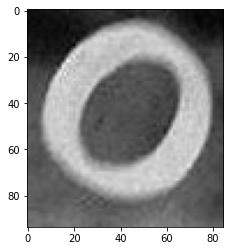

In [2]:
DATADIR = "C:/Users/saimo/Downloads/images"
CATEGORIES = ["0","1","2","3","4","5","6","7","8","9","0","ba","pa"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [4]:
img_array.shape

(94, 85)

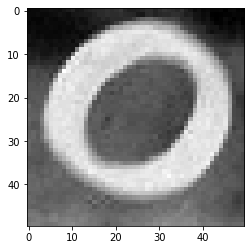

In [5]:
IMG_SHAPE = 50

new_array = cv2.resize(img_array, (IMG_SHAPE, IMG_SHAPE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [7]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SHAPE, IMG_SHAPE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
    
create_training_data()
        


In [8]:
print(len(training_data))

2129


In [9]:
import random

random.shuffle(training_data)

In [12]:
for sample in training_data:
    print(sample[2])

IndexError: list index out of range

In [15]:
X = [] 
y = []

In [16]:
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SHAPE, IMG_SHAPE, 1)


In [17]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [18]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)